# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


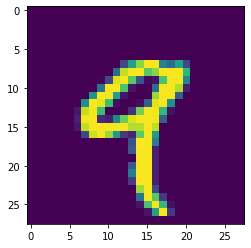

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # output(26,26,8) R.F(3,3),K.size(3,3,1)
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # (24,24,16), R.f(5,5),k.size(3,3,8)
model.add(Convolution2D(8, 1, 1, activation='relu', input_shape=(28,28,1))) # (24,24,8), R.F(5,5),k.size(1,1,16)
model.add(MaxPooling2D(pool_size=(2, 2))) # (12,12,8)
model.add(Convolution2D(16, 3, 3, activation='relu')) # (10,10,16),k.size(3,3,8)
model.add(Convolution2D(32, 3, 3, activation='relu')) # (8,8,32),k.size(3,3,16)
model.add(Convolution2D(64, 3, 3, activation='relu')) # (6,6,64),k.size(3,3,32)
model.add(Convolution2D(10, 6)) # (1,1,10),k.size(6,6,64)
model.add(Flatten())
model.add(Activation('softmax'))

#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu' ))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#model.add(Convolution2D(10, 13))
#model.add(Flatten())
#model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_301 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 24, 24, 8)         136       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 6, 6, 64)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.0276 - acc: 0.9910
Epoch 2/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0216 - acc: 0.9931
Epoch 3/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0170 - acc: 0.9946
Epoch 4/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0150 - acc: 0.9951
Epoch 5/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.0114 - acc: 0.9965
Epoch 6/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0123 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0093 - acc: 0.9969
Epoch 8/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.0073 - acc: 0.9978
Epoch 9/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.0084 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 23s 377us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=15)
print(score)

[0.042216326367050076, 0.9911]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.58906927e-18 6.62281123e-19 9.91503835e-14 2.05520517e-10
  1.78517527e-24 3.34042447e-20 2.79261234e-30 1.00000000e+00
  6.55132370e-19 2.02105303e-12]
 [3.11374006e-18 1.36128685e-21 1.00000000e+00 1.03759379e-28
  7.94289668e-28 6.98432837e-29 4.58707686e-15 1.12790770e-24
  5.64244517e-20 2.73919032e-25]
 [1.72409965e-14 1.00000000e+00 5.96588276e-14 1.30705300e-18
  4.85115081e-15 3.30247830e-12 2.07379984e-13 4.15941760e-11
  1.74808410e-13 8.74544366e-16]
 [1.00000000e+00 1.84133630e-17 2.20730878e-09 3.58962736e-17
  8.51384826e-13 1.86860510e-12 6.11136863e-10 3.28476342e-19
  4.73652237e-12 2.86378654e-08]
 [2.04137994e-24 2.33812051e-20 4.28159187e-26 5.04536590e-28
  1.00000000e+00 2.89506572e-29 7.59505283e-21 2.46647897e-27
  6.57383660e-17 1.09780815e-14]
 [9.76211924e-18 1.00000000e+00 5.49709517e-15 7.74539149e-19
  1.72526398e-14 1.64742522e-16 2.89843319e-16 8.25263746e-11
  1.96292937e-16 9.57362608e-19]
 [4.32174883e-24 4.98183146e-13 7.50011279e-17 2.13854070e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_273': <keras.layers.convolutional.Conv2D object at 0x7f3e084fc588>, 'conv2d_274': <keras.layers.convolutional.Conv2D object at 0x7f3e084fc438>, 'conv2d_275': <keras.layers.convolutional.Conv2D object at 0x7f3e084fcba8>, 'max_pooling2d_63': <keras.layers.pooling.MaxPooling2D object at 0x7f3e084c4978>, 'conv2d_276': <keras.layers.convolutional.Conv2D object at 0x7f3e084b0fd0>, 'conv2d_277': <keras.layers.convolutional.Conv2D object at 0x7f3e084c5c18>, 'conv2d_278': <keras.layers.convolutional.Conv2D object at 0x7f3e084c56d8>, 'conv2d_279': <keras.layers.convolutional.Conv2D object at 0x7f3e084d29e8>, 'flatten_50': <keras.layers.core.Flatten object at 0x7f3e084de898>, 'activation_46': <keras.layers.core.Activation object at 0x7f3e084eb208>}


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored